In [1]:
import numpy as np
import pandas as pd

C:\Users\basic\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\basic\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


Question 4a:

In [119]:
face_data_dict = np.load("face_emotion_data.npz")
face_features = face_data_dict["X"]
face_labels = face_data_dict["y"]
n,p = face_features.shape

# Solve the least - squares solution . weights is the array of weight coefficients
# TODO : find weights

X = face_features
def get_weights(X, face_labels):
    XtX_inv = np.linalg.inv(np.matmul(X.T, X)) # (X^T X)^-1
    XtX_inv_Xt = np.matmul(XtX_inv, X.T) # (X^T X)^-1 X^T
    weights = np.dot(XtX_inv_Xt, face_labels) # (X^T X)^-1 X^T y
    return weights

weights = get_weights(X, face_labels)

print(f"Part 4 a: Found weights:\n {weights}")

Part 4 a: Found weights:
 [[ 0.94366942]
 [ 0.21373778]
 [ 0.26641775]
 [-0.39221373]
 [-0.00538552]
 [-0.01764687]
 [-0.16632809]
 [-0.0822838 ]
 [-0.16644364]]


Question 4c:

In [120]:
def get_prediction(X, w):
    y_raw = np.dot(X, w)
    y = np.where(y_raw >=0, 1, -1)
    return y

def lstsq_cv_err(features: np.ndarray, labels:np.ndarray, subset_count: int=8) -> float:

    sample_count, feature_count = features.shape
    subset_size = sample_count // subset_count
    # Reshape arrays for easier subset - level manipulation
    features = features.reshape(subset_count, subset_size, feature_count)
    labels = labels.reshape(subset_count, subset_size)

    subset_idcs = np.arange(subset_count)
    train_set_size = (subset_count - 1)*subset_size
    subset_err_counts = np.zeros(subset_count)

    for i in range(subset_count):
        # TODO : select relevant datasets
        # fit and evaluate a linear model ,
        # then store errors in subset_err_counts[i]
        X_training = np.delete(features, i, 0).reshape(train_set_size, feature_count)
        labels_training = np.delete(labels, i, 0).reshape(train_set_size)
        weights = get_weights(X_training, labels_training)

        pred = get_prediction(features[i], weights)
        diff = abs(np.subtract(labels[i], pred)).sum()

        subset_err_counts[i] = diff
        pass

    # Average over the entire dataset to find the classification error
    cls_err = np.sum(subset_err_counts) / (subset_count*subset_size)
    return cls_err

# Run on the dataset with all features included
full_feat_cv_err = lstsq_cv_err(face_features, face_labels)
print(f"Error estimate: {full_feat_cv_err*100:.3f}%")


Error estimate: 9.375%


Question 4e

In [121]:
import itertools


In [122]:
import itertools
def test_removing_features(features: np.ndarray, labels:np.ndarray, removeme, quiet=False):
    feats = np.delete(features, removeme, 1)
    full_feat_cv_err = lstsq_cv_err(feats, labels)
    if not quiet:
        print(f"Removing Features: {removeme} --> Error estimate: {full_feat_cv_err*100:.3f}%")
    return full_feat_cv_err*100

#Go through least impactful features in original 9-feat model and remove them until we beat 6%
desired_acc = 6
orig_weights_sorted = np.argsort(abs(get_weights(face_features, face_labels).reshape(p)).tolist())
best_error = lstsq_cv_err(face_features, face_labels)*100

test_num = 0
feats_to_remove = []

print("Trying 4d strategy:\n")

while (best_error > desired_acc) and (test_num < p):
    feats_to_remove.append(orig_weights_sorted[test_num])
    test_num+=1
    test_error = test_removing_features(face_features, face_labels, feats_to_remove)
    if (test_error < best_error):
        best_error = test_removing_features(face_features, face_labels, feats_to_remove)

#Screw it, brute-force time:
print("\nBrute-Force:\n")
best_combo = []
for i in range(0, p):
    for combo in list(itertools.combinations(orig_weights_sorted, i)):
        test_error = test_removing_features(face_features, face_labels, list(combo), True)
        if (test_error < best_error):
            best_combo = combo
            best_error = test_error

print(f"Found best combo: Remove features {best_combo} to get {best_error:.3f}%")
        

Trying 4d strategy:

Removing Features: [4] --> Error estimate: 9.375%
Removing Features: [4, 5] --> Error estimate: 9.375%
Removing Features: [4, 5, 7] --> Error estimate: 9.375%
Removing Features: [4, 5, 7, 6] --> Error estimate: 10.938%
Removing Features: [4, 5, 7, 6, 8] --> Error estimate: 14.062%
Removing Features: [4, 5, 7, 6, 8, 1] --> Error estimate: 15.625%
Removing Features: [4, 5, 7, 6, 8, 1, 2] --> Error estimate: 17.188%
Removing Features: [4, 5, 7, 6, 8, 1, 2, 3] --> Error estimate: 14.062%
Removing Features: [4, 5, 7, 6, 8, 1, 2, 3, 0] --> Error estimate: 92.188%

Brute-Force:

Found best combo: Remove features (7, 1) to get 6.250%


Question 5

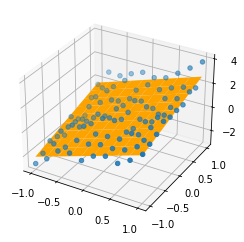

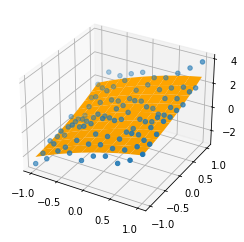

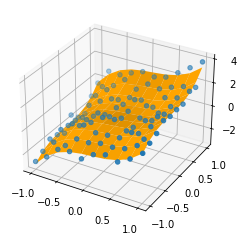

In [195]:
import numpy as np
import matplotlib.pyplot as plt
# File available on Canvas
data = np.load("polydata_2D.npz")
x1 = np.ravel(data["x1"])
x2 = np.ravel(data["x2"])
y = data["y"]
N = x1.size
p = np.zeros((3, N))


#TODO
for d in [1 ,2 ,3]:
    # Generate the X matrix for this d
    X_1 = np.vander(x1, d+1, increasing=True)
    X_2 = np.vander(x2, d+1, increasing=True)
    X = np.hstack((X_1, X_2[:,1:])) #Found via numpy docs

    # Find the least - squares weight matrix w_d
    weights_d = get_weights(X, y)

    # Evaluate the best - fit polynomial at each point ( x1 , x2 )
    X_w = np.dot(X, weights_d.T)
    # and store the result in the corresponding column of p
    p[d-1] = X_w

# Plot the degree 1 surface
Z1 = p[0,:].reshape(data["x1"].shape)
ax = plt.axes(projection='3d')
ax.scatter(data["x1"], data["x2"], y)
ax.plot_surface (data["x1"], data ["x2"], Z1, color="orange")
plt.show()
# Plot the degree 2 surface
Z2 = p[1,:].reshape(data["x1"].shape)
ax = plt.axes(projection="3d")
ax.scatter(data["x1"], data["x2"], y )
ax.plot_surface(data["x1"], data["x2"], Z2, color="orange")
plt.show()
# Plot the degree 3 surface
Z3 = p[2,:].reshape(data["x1"].shape)
ax = plt.axes(projection="3d")
ax.scatter(data["x1"], data["x2"], y )
ax.plot_surface(data["x1"], data["x2"], Z3 , color="orange")


In [169]:
print(x2)

[-1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -0.77777778 -0.77777778
 -0.77777778 -0.77777778 -0.77777778 -0.77777778 -0.77777778 -0.77777778
 -0.77777778 -0.77777778 -0.55555556 -0.55555556 -0.55555556 -0.55555556
 -0.55555556 -0.55555556 -0.55555556 -0.55555556 -0.55555556 -0.55555556
 -0.33333333 -0.33333333 -0.33333333 -0.33333333 -0.33333333 -0.33333333
 -0.33333333 -0.33333333 -0.33333333 -0.33333333 -0.11111111 -0.11111111
 -0.11111111 -0.11111111 -0.11111111 -0.11111111 -0.11111111 -0.11111111
 -0.11111111 -0.11111111  0.11111111  0.11111111  0.11111111  0.11111111
  0.11111111  0.11111111  0.11111111  0.11111111  0.11111111  0.11111111
  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333  0.33333333
  0.33333333  0.33333333  0.33333333  0.33333333  0.55555556  0.55555556
  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556  0.55555556
  0.55555556  0.55555556  0.77777778  0.77777778  0.7777777

In [165]:
print(x1)

[-1.         -0.77777778 -0.55555556 -0.33333333 -0.11111111  0.11111111
  0.33333333  0.55555556  0.77777778  1.         -1.         -0.77777778
 -0.55555556 -0.33333333 -0.11111111  0.11111111  0.33333333  0.55555556
  0.77777778  1.         -1.         -0.77777778 -0.55555556 -0.33333333
 -0.11111111  0.11111111  0.33333333  0.55555556  0.77777778  1.
 -1.         -0.77777778 -0.55555556 -0.33333333 -0.11111111  0.11111111
  0.33333333  0.55555556  0.77777778  1.         -1.         -0.77777778
 -0.55555556 -0.33333333 -0.11111111  0.11111111  0.33333333  0.55555556
  0.77777778  1.         -1.         -0.77777778 -0.55555556 -0.33333333
 -0.11111111  0.11111111  0.33333333  0.55555556  0.77777778  1.
 -1.         -0.77777778 -0.55555556 -0.33333333 -0.11111111  0.11111111
  0.33333333  0.55555556  0.77777778  1.         -1.         -0.77777778
 -0.55555556 -0.33333333 -0.11111111  0.11111111  0.33333333  0.55555556
  0.77777778  1.         -1.         -0.77777778 -0.55555556 -0.333